In [1]:
"""
Phishing LightGBM TF-IDF-based classification model
"""
__author__ = "Alisher Mazhirinov"

In [2]:
import pandas as pd

## Load datasets

In [3]:
phishing = pd.read_parquet('../feature-extraction/floor/phishing_tfidf.parquet')
benign = pd.read_parquet('../feature-extraction/floor/benignForPhishing_tfidf.parquet')

In [84]:
phishing_cols = [col for col in phishing.columns if col.startswith('tfidf_phishing_')]
# Calculate the sum of all tf-idf features
phishing['tfidf_phishing_total'] = phishing[phishing_cols].sum(axis=1)
# Delete rows with zero values
phishing = phishing[phishing['tfidf_phishing_total'] > 0].reset_index(drop=True)
phishing

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,tfidf_phishing_posts,tfidf_phishing_profile,tfidf_phishing_visit,...,tfidf_phishing_events,tfidf_phishing_view,tfidf_phishing_news,tfidf_phishing_best,tfidf_phishing_find,tfidf_phishing_online,tfidf_phishing_read,tfidf_phishing_standard,tfidf_phishing_school,tfidf_phishing_total
0,fbgch.blogspot.fi,1,en,1,99,26,17,1,1,1,...,0,0,0,0,0,0,0,0,0,9
1,rjymb.blogspot.hr,1,en,1,99,26,17,1,1,1,...,0,0,0,0,0,0,0,0,0,9
2,spst3.mjt.lu,1,en,1,23,115,12,0,0,0,...,0,0,0,1,0,0,0,0,0,10
3,rmtjy.blogspot.am,1,en,1,99,26,17,1,1,1,...,0,0,0,0,0,0,0,0,0,9
4,bigbangmanifesto.com,1,en,8,341,905,20,0,0,0,...,0,0,0,3,0,0,2,0,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,bionicwebdesign.com,1,en,11,403,799,19,1,0,0,...,0,0,0,4,1,1,0,1,0,41
6730,procurerest.s3-tastewp.com,1,en,10,2982,7608,26,2,11,4,...,0,0,0,1,3,1,3,0,0,1076
6731,www.dms-mining.com.na,1,en,22,473,244,21,0,0,0,...,0,3,0,0,0,0,0,0,0,17
6732,d271eg8bg145b3.cloudfront.net,1,en,8,394,747,29,0,0,1,...,0,2,3,0,3,2,0,0,0,80


In [85]:
# Do the same with benign dataset
benign_cols = [col for col in benign.columns if col.startswith('tfidf_phishing_')]
benign['tfidf_phishing_total'] = benign[benign_cols].sum(axis=1)
benign = benign[benign['tfidf_phishing_total'] > 0].reset_index(drop=True)
# Make benign dataset contain the same amount of features as in malware dataset
benign = benign.head(6734).reset_index(drop=True)
benign

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,tfidf_phishing_posts,tfidf_phishing_profile,tfidf_phishing_visit,...,tfidf_phishing_events,tfidf_phishing_view,tfidf_phishing_news,tfidf_phishing_best,tfidf_phishing_find,tfidf_phishing_online,tfidf_phishing_read,tfidf_phishing_standard,tfidf_phishing_school,tfidf_phishing_total
0,portal.ife.ugo.aero,0,en,4,28,86,19,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,pressbooks.pub,0,en,4,136,120,14,0,0,1,...,0,0,0,0,0,0,0,0,0,18
2,arcs-praha-ds.cz2.quickconnect.to,0,en,1,59,277,33,0,0,0,...,0,0,0,0,0,0,0,0,0,18
3,blue-mail-email-exchange.apk.cafe,0,en,2,2962,4776,33,0,0,0,...,4,4,4,2,2,1,0,0,0,194
4,aca2023.iit.sggw.pl,0,en,12,480,325,19,0,0,0,...,0,0,1,1,0,0,0,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6729,viewfrom.earth,0,en,8,628,619,14,0,0,0,...,0,0,0,0,0,0,0,0,0,5
6730,waterways.ltd.uk,0,en,10,670,699,16,0,0,1,...,0,0,0,0,1,1,0,0,0,46
6731,warma.org.zm,0,en,12,701,607,12,1,0,1,...,0,0,1,2,1,0,0,0,0,31
6732,viking-appliance.repair,0,en,22,707,1286,23,1,0,1,...,0,2,0,4,2,0,0,0,0,48


In [86]:
# Concatenate two datasets
combined_df = pd.concat([phishing, benign], ignore_index=True)
# Shuffle them in random order
shuffled_df = combined_df.sample(frac=1, random_state=42).reset_index(drop=True)
shuffled_df

,domain_name,label,language,malicious_tags,all_tags,word_count,domain_length,tfidf_phishing_posts,tfidf_phishing_profile,tfidf_phishing_visit,...,tfidf_phishing_events,tfidf_phishing_view,tfidf_phishing_news,tfidf_phishing_best,tfidf_phishing_find,tfidf_phishing_online,tfidf_phishing_read,tfidf_phishing_standard,tfidf_phishing_school,tfidf_phishing_total
0,drx.works,0,en,4,474,293,9,0,0,0,...,0,0,1,0,2,0,0,0,0,12
1,briefly.co.za,0,en,7,1272,1614,13,0,0,1,...,0,1,4,2,0,1,13,0,2,41
2,bafybeibzkqukq26eelwvcna2gnl2nhxhlbrizj6s7rupo...,1,en,6,46,27,74,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,shaheedfoundation.org.pk,1,en,1,19,16,24,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,siroko.bike,0,en,6,3842,2338,11,0,0,0,...,0,0,2,0,0,0,0,0,0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13463,bangla52globalbrand.com,1,en,1,19,16,23,0,0,0,...,0,0,0,0,0,0,0,0,0,5
13464,tpf.legal,0,en,23,358,573,9,1,0,0,...,0,0,0,1,0,0,0,0,0,24
13465,treatsbytesayold.firebaseapp.com,1,en,1,7,14,32,0,0,0,...,0,0,0,0,0,0,0,0,0,2
13466,ladyrareapepeyc.com,1,en,31,911,905,19,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [87]:
# Delete all unnecessary features + overfitted features
shuffled_df = shuffled_df.drop(columns=['language', 'domain_name', 'word_count', 'domain_length', 'all_tags', 
                                         'tfidf_phishing_contact', 'tfidf_phishing_new', 'tfidf_phishing_news',
                                         'tfidf_phishing_privacy', 'tfidf_phishing_policy', 'tfidf_phishing_support',
                                         'tfidf_phishing_help',
                                         'malicious_tags', 'tfidf_phishing_total'])
#shuffled_df.to_csv('7_output_files/main_bp_dataset.csv', index=False)

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y = shuffled_df['label']
X = shuffled_df.drop(['label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40],
    'max_depth': [-1, 10, 20],
    'feature_fraction': [0.6, 0.8, 1.0],
    'bagging_fraction': [0.6, 0.8, 1.0],
    'bagging_freq': [0, 5, 10],
    'lambda_l1': [0, 1, 5],
    'lambda_l2': [0, 1, 5],
    'min_data_in_leaf': [10, 20, 50],
    'min_split_gain': [0, 0.01, 0.1],
    'scale_pos_weight': [1, 2, 5],
    'n_estimators': [400],
    'boosting_type': ['gbdt', 'dart'],
}

# Set up the LightGBM model
lgb_estimator = lgb.LGBMClassifier(objective='binary', metric='binary_logloss')

# Perform Randomized Search for parameter tuning
random_search = RandomizedSearchCV(estimator=lgb_estimator, param_distributions=param_grid, 
                                   n_iter=50, scoring='accuracy', cv=5, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Parameters:", random_search.best_params_)

# Predict and evaluate the model
y_pred = random_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] l

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


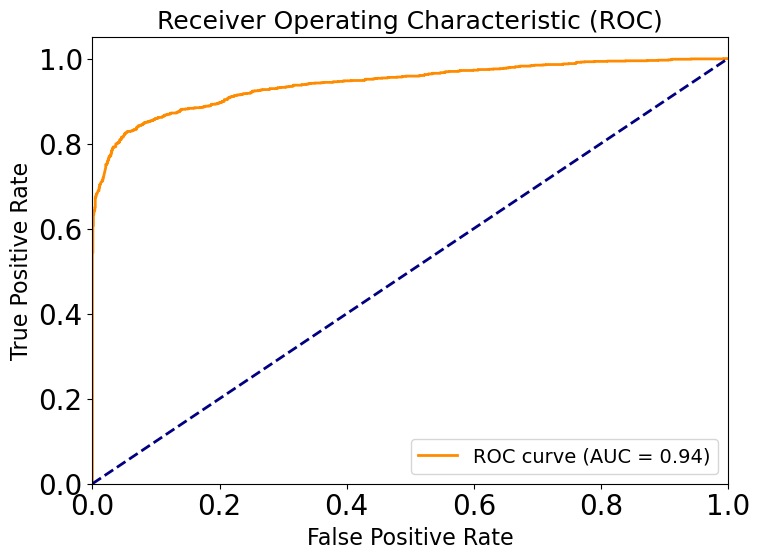

In [90]:
from sklearn.metrics import roc_curve, auc

# Get the probabilities for the positive class (label=1)
y_proba = random_search.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=18)
plt.legend(loc="lower right", fontsize=14)

plt.tight_layout()
plt.savefig("phishing_lgbm_roc_auc.pdf", dpi=300, bbox_inches='tight')
plt.show()

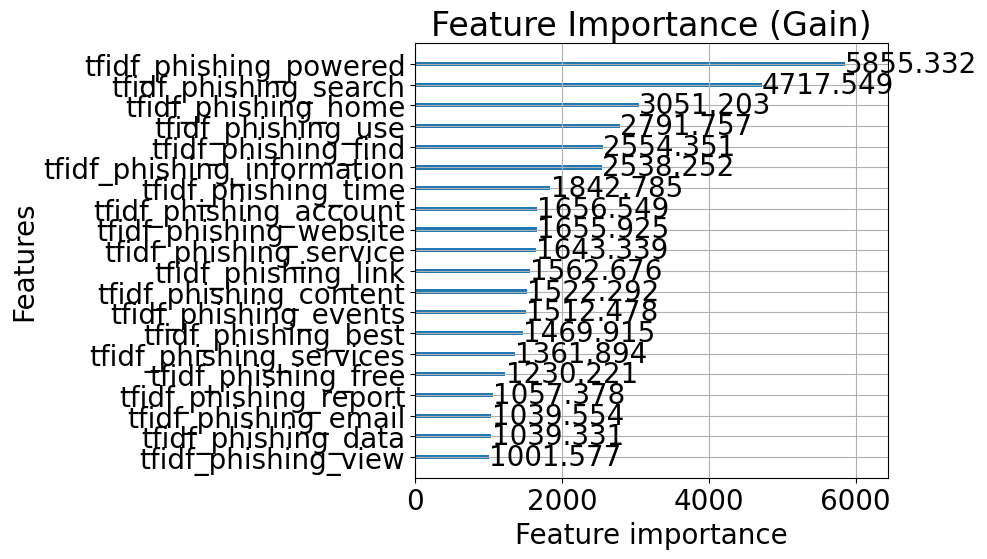

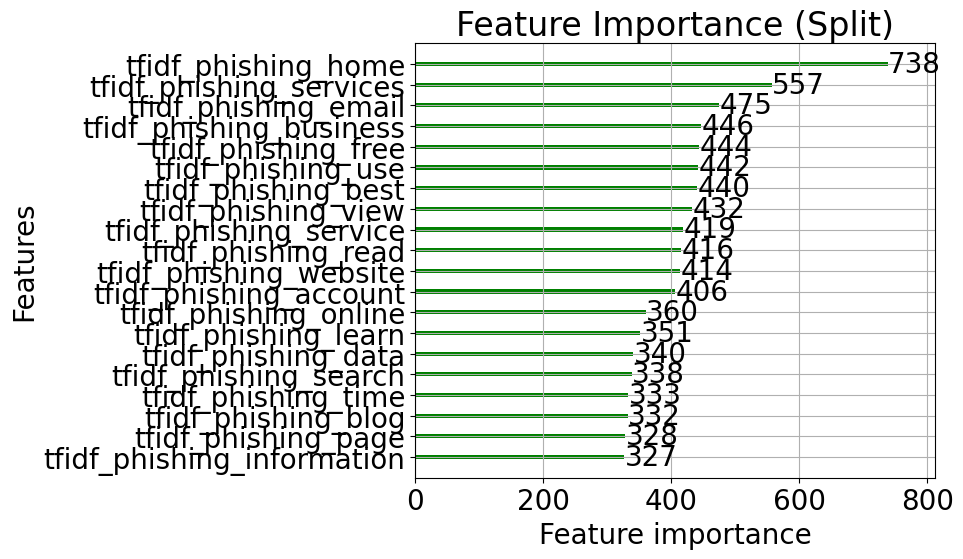

In [91]:
# Feature Importance (Gain-based)
lgb.plot_importance(random_search.best_estimator_, importance_type='gain', max_num_features=20, figsize=(10, 6))
plt.title("Feature Importance (Gain)")
plt.tight_layout()
plt.show()

# Feature Importance (Split-based)
lgb.plot_importance(random_search.best_estimator_, importance_type='split', max_num_features=20, figsize=(10, 6), color="green")
plt.title("Feature Importance (Split)")
plt.tight_layout()
plt.show()

## Log loss plot

[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=5, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] feature_fraction is set=1.0, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=1.0
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.0 will be ignored. Current va

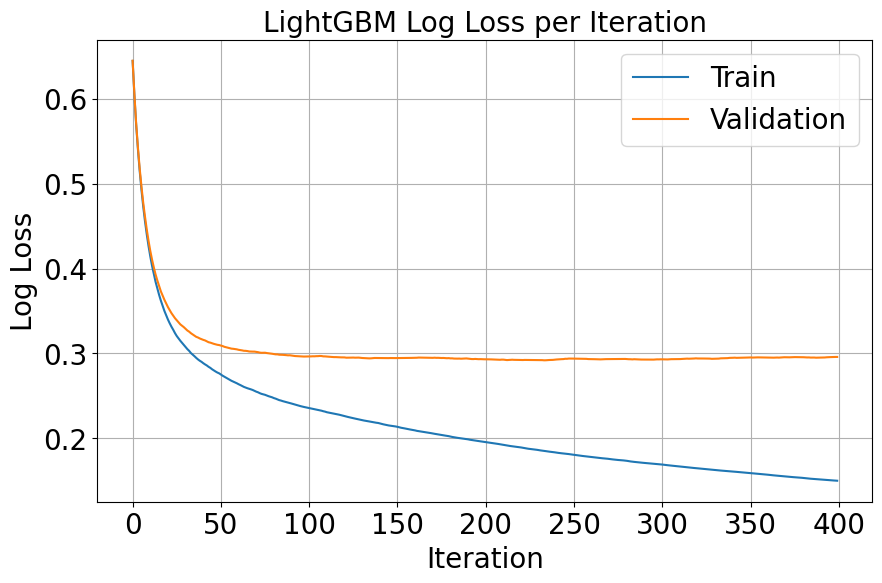

In [92]:
best_model = random_search.best_estimator_

# Refit model to capture evaluation results
eval_result = {}
best_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_metric='binary_logloss',
    eval_names=['train', 'valid'],
    callbacks=[lgb.record_evaluation(eval_result), lgb.log_evaluation(0)]
)
# Plot log loss
plt.figure(figsize=(10,6))
epochs = len(eval_result['train']['binary_logloss'])
x_axis = range(0, epochs)
plt.plot(x_axis, eval_result['train']['binary_logloss'], label='Train')
plt.plot(x_axis, eval_result['valid']['binary_logloss'], label='Validation')
plt.xlabel('Iteration', fontsize=20)
plt.ylabel('Log Loss', fontsize=20)
plt.title('LightGBM Log Loss per Iteration', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)
plt.grid()
plt.savefig("phishing_lgbm_log_loss.pdf", dpi=300, bbox_inches='tight')
plt.show()

## Feature importance with SHAP

c:\Users\mazhirinova\AppData\Local\anaconda3\envs\ibt_kernel\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


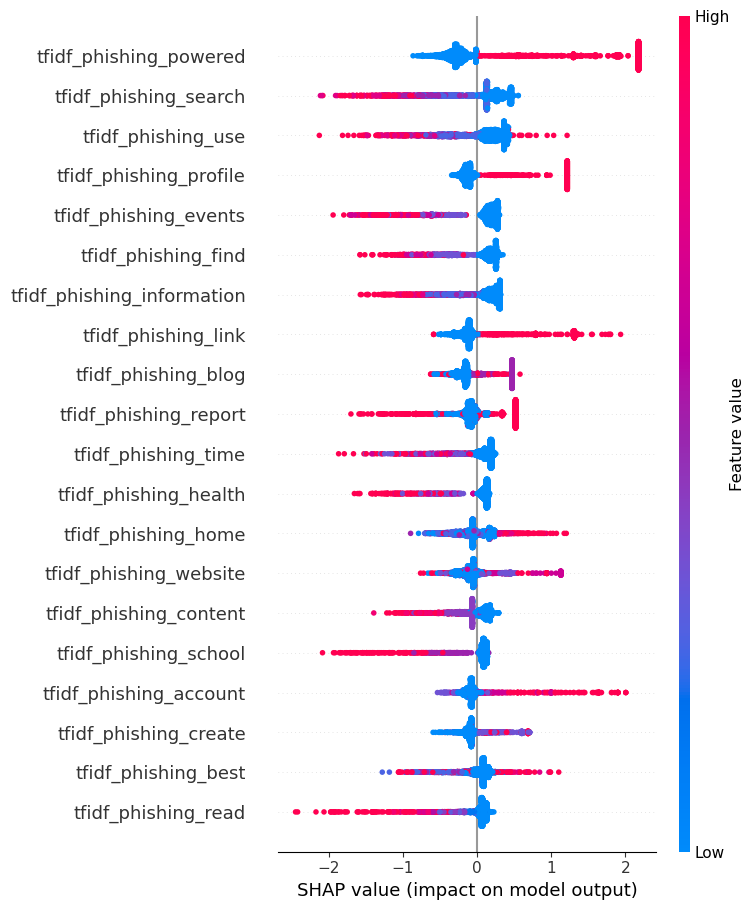

In [93]:
import shap

# SHAP: Create explainer
explainer = shap.Explainer(random_search.best_estimator_)
shap_values = explainer.shap_values(X_test)

# Summary Plot
shap.summary_plot(shap_values, X_test, plot_type="dot")